In [49]:
#se cargan las librerias

!pip install yahooquery
!pip install yfinance
import yfinance as yf
import pandas as pd
from yahooquery import Ticker
from pandas import to_datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from pandas.core.api import date_range


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
# descargamos los datos de YF
# Specify the underlying asset
symbol = 'SPY'
start_date='2022-01-01'
end_date='2022-12-31'
# Download historical data for the underlying asset
asset = yf.download(symbol, start=start_date, end=end_date)
asset.to_csv('my_dataset_YF.csv', index=True)
#print (asset.index)
#print (asset)

[*********************100%***********************]  1 of 1 completed


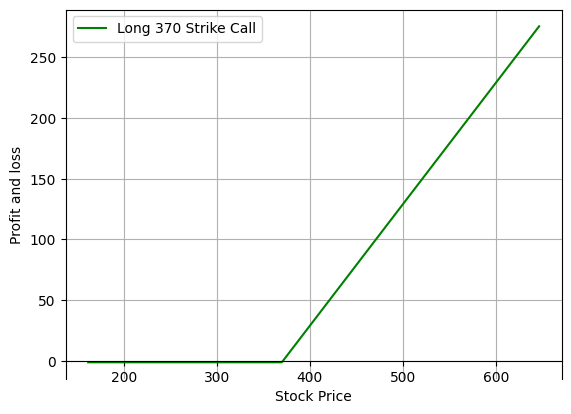

In [51]:
#ejercicio

def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

#ok
# Stock price
spot_price = 323.40
# Long call
strike_price_long_call = 370
premium_long_call = 1.30
# Short call
strike_price_short_call = 350
premium_short_call = 3.30
# Stock price range at expiration of the call
sT = np.arange(0.5*spot_price,2*spot_price,1)

payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,label='Long 370 Strike Call',color='g')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
#ax.spines['top'].set_visible(False) # Top border removed
#ax.spines['right'].set_visible(False) # Right border removed
#ax.tick_params(top=False, right=False) # Removes the tick-marks on the RHS
plt.grid()
plt.show()

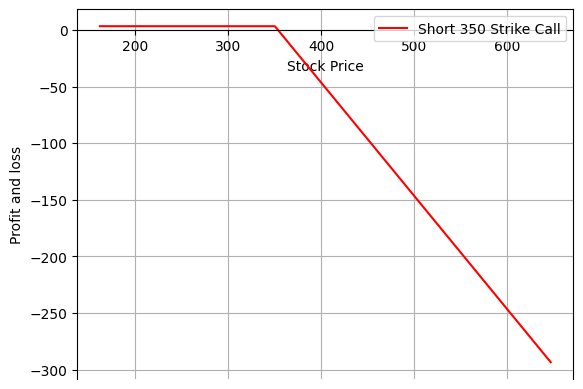

In [52]:
#ejercicio
payoff_short_call = call_payoff(sT, strike_price_short_call, premium_short_call) * -1.0
#ok
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call,label='Short 350 Strike Call',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.grid()
plt.show()

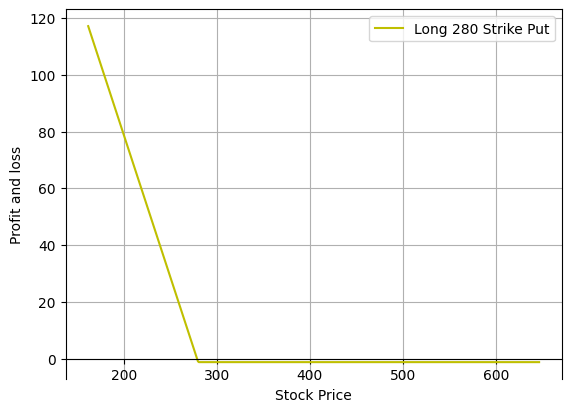

In [54]:
#ejercicio
def put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - sT, 0) - premium
#ok
# Stock price
spot_price = 323.40
# Long put
strike_price_long_put = 280
premium_long_put = 1.20
# Short put
strike_price_short_put = 300
premium_short_put = 3.40
# Stock price range at expiration of the put
sT = np.arange(0.5*spot_price,2*spot_price,1)

payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_put,label='Long 280 Strike Put',color='y')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.grid()
plt.show()

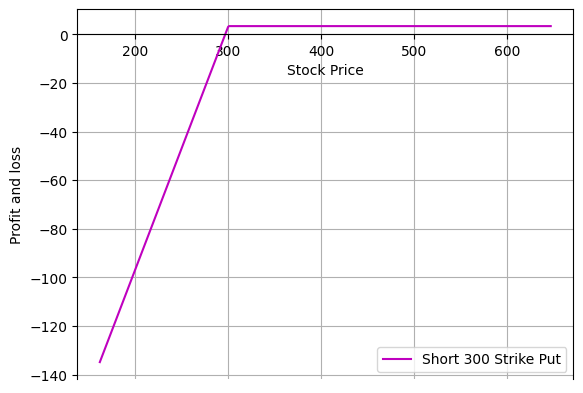

In [55]:
#ejercicio
payoff_short_put = put_payoff(sT, strike_price_short_put, premium_short_put) * -1.0
#ok
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_put,label='Short 300 Strike Put',color='m')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.grid()
plt.show()

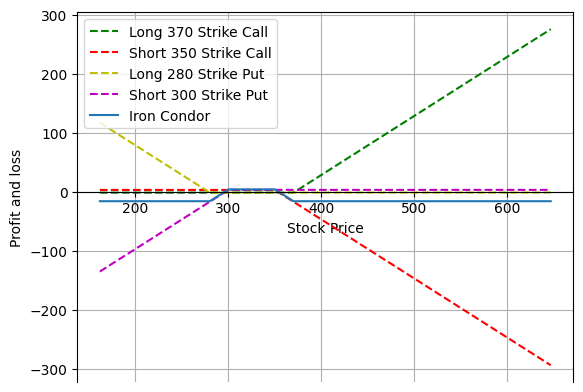

In [56]:
#ejercicio
payoff = payoff_long_call + payoff_short_call + payoff_long_put + payoff_short_put
#ok
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,'--',label='Long 370 Strike Call',color='g')
ax.plot(sT,payoff_short_call,'--',label='Short 350 Strike Call',color='r')
ax.plot(sT,payoff_long_put,'--',label='Long 280 Strike Put',color='y')
ax.plot(sT,payoff_short_put,'--',label='Short 300 Strike Put',color='m')
ax.plot(sT,payoff,label='Iron Condor')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.grid()
plt.show()

Fin del ejercicio
high 477.8500061035156
low 473.8500061035156
spot_price 468.2964172363281


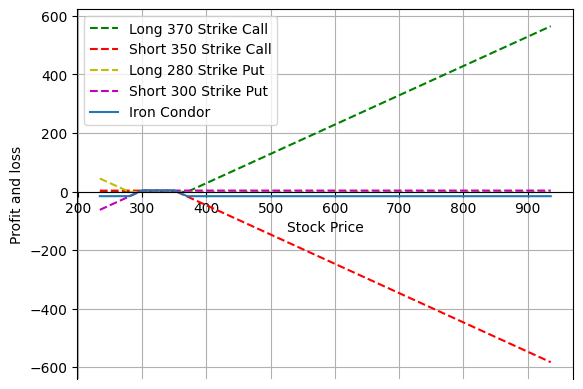

In [59]:
#backtest

#conceptual de estrategía
#-----------------------------------------
#perdida por prima

#call venta
strike_price_long_call = 370
strike_price_short_call = 350

#ganancias



#put compra
strike_price_long_put = 280
strike_price_short_put = 300

#perdida por prima


# Long put
strike_price_long_put = 280
premium_long_put = 1.20
# Short put
strike_price_short_put = 300
premium_short_put = 3.40
#-----------------------------------------


#calculos
payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
payoff_short_call = call_payoff(sT, strike_price_short_call, premium_short_call) * -1.0
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_short_put = put_payoff(sT, strike_price_short_put, premium_short_put) * -1.0




#iteramos el dataset llamado asset
for index , row in asset.iterrows():


    high = row['High']
    low = row['Low']
    spot_price = row['Adj Close']
    fecha =index


    # Stock price
    #spot_price = 323.40

    # Long call
    strike_price_long_call = 370
    premium_long_call = 1.30

    # Short call
    strike_price_short_call = 350
    premium_short_call = 3.30

    timestamp_str = '2022-06-17 10:30:00'
    timestamp_obj = to_datetime(timestamp_str)



    # Stock price range at expiration of the call
    sT = np.arange(0.5*spot_price,2*spot_price,1)






    
    
    if fecha > timestamp_obj or (strike_price_long_call < low or strike_price_short_call >high or strike_price_long_put < low or strike_price_short_put > high)  :
     payoff = payoff_long_call + payoff_short_call + payoff_long_put + payoff_short_put
     print ("Fin del ejercicio" )
     print ('high',high)
     print ('low',low)
     print ('spot_price',spot_price)
     
     #graficación 

     fig, ax = plt.subplots()
     ax.spines['bottom'].set_position('zero')
     ax.plot(sT,payoff_long_call,'--',label='Long 370 Strike Call',color='g')
     ax.plot(sT,payoff_short_call,'--',label='Short 350 Strike Call',color='r')
     ax.plot(sT,payoff_long_put,'--',label='Long 280 Strike Put',color='y')
     ax.plot(sT,payoff_short_put,'--',label='Short 300 Strike Put',color='m')
     ax.plot(sT,payoff,label='Iron Condor')
     plt.xlabel('Stock Price')
     plt.ylabel('Profit and loss')
     plt.legend()
     plt.grid()
     plt.show()

     break

